In [4]:
import json
from pprint import pprint
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster

from sklearn.decomposition import PCA
from sklearn.neighbors import DistanceMetric
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import pairwise_distances

In [5]:
# additional set up
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) # suppress scientific float notation

# constants and parameters
DATA_PATH = './data/'
IMG_PATH = './'

# load data 
with open(f'data_file_20181203.json') as f:
    data = json.load(f)

In [6]:
# create data frame
df = {'Name': np.zeros(len(data['quantlets'])), 
      'author_of_last_comm': np.zeros(len(data['quantlets'])),
      'is_debuggable': np.zeros(len(data['quantlets'])), 
      'grade': np.zeros(len(data['quantlets'])),
      'keywords': np.zeros(len(data['quantlets']))}

df = pd.DataFrame(data=df)

In [7]:
# extract the columns we need
counter=0
for c, i in enumerate(data['quantlets']):
    print(i)
    df.loc[c,'Name'] = i
    df.loc[c,'author_of_first_comm'] = data['quantlets'][i]['commit_first']['commit']['author']['name']
    df.loc[c,'author_of_last_comm'] = data['quantlets'][i]['commit_last']['commit']['author']['name']
    df.loc[c,'is_debuggable'] = data['quantlets'][i]['is_debuggable']
    try:
        df.loc[c,'grade'] = data['quantlets'][i]['grade']
        df.loc[c,'keywords'] = ' '.join(str(e) for e in set(data['quantlets'][i]['keyword_list']))
    except:
        df.loc[c,'grade'] = 'did not work'
        df.loc[c,'keywords'] ='did not work'
        counter+=1
print(f'Could not load {counter} quantlets.')
df = df[df['is_debuggable']==True]

ADM/HermPolyPlot/Metainfo.txt
ARR/ARRboxage/Metainfo.txt
ARR/ARRboxgscit/Metainfo.txt
ARR/ARRboxhb/Metainfo.txt
ARR/ARRcormer/Metainfo.txt
ARR/ARRdenmer2d/Metainfo.txt
ARR/ARRdenmer3d/Metainfo.txt
ARR/ARRhexage/Metainfo.txt
ARR/ARRhexcit/Metainfo.txt
ARR/ARRhexhin/Metainfo.txt
ARR/ARRhismer/Metainfo.txt
ARR/ARRmosage/Metainfo.txt
ARR/ARRmosagegr/Metainfo.txt
ARR/ARRmossub/Metainfo.txt
ARR/ARRpcpgscit/Metainfo.txt
ARR/ARRpcphb/Metainfo.txt
ARR/ARRpcpmer/Metainfo.txt
ARR/ARRpcprp/Metainfo.txt
ARR/ARRqrqqhb/Metainfo.txt
ARR/ARRscaage/Metainfo.txt
ARR/ARRscamer/Metainfo.txt
Adaptive_Penalized_Macro_Factors/Metainfo.txt
BCS-1/BCS_Kernel_nhTemp/Metainfo.txt
BCS-1/BCS_MLRleaps/Metainfo.txt
BCS-1/BCS_RANDU/Metainfo.txt
BCS/BCS_ARM/MetaInfo.txt
BCS/BCS_ArchimedeanContour/MetaInfo.txt
BCS/BCS_BarGraphs/MetaInfo.txt
BCS/BCS_Bincdf/MetaInfo.txt
BCS/BCS_Binhist/MetaInfo.txt
BCS/BCS_Binhyper/MetaInfo.txt
BCS/BCS_Binnorm/MetaInfo.txt
BCS/BCS_BinormalDensity/MetaInfo.txt
BCS/BCS_Binpdf/MetaInfo.txt
BC

Face-Recognition/FaceRecognition_SVM/MetaInfo.txt
Face-Recognition/FaceRecognition_kNN/MetaInfo.txt
Factor_copula_systemic/FCOP_network_plots/Metainfo.txt
FittingElephant/Metainfo.txt
GMMvb/metainfo.txt
GPLM/GPLM_example1_H0_fixed_design/Metainfo.txt
GPLM/GPLM_example1_H0_random_design/Metainfo.txt
GPLM/GPLM_example1_H1/Metainfo.txt
GPLM/GPLM_example2_wood/Metainfo.txt
GPLM/GPLM_example3_non-orthogonal/Metainfo.txt
GPLM/GPLM_example3_orthogonal/Metainfo.txt
GPLM/GPLM_example4_non-orthogonal/Metainfo.txt
GPLM/GPLM_example4_orthogonal/Metainfo.txt
GPLM/GPLM_example5_poisson_non-orthogonal/Metainfo.txt
GPLM/GPLM_example5_poisson_orthogonal/Metainfo.txt
GeoCopula/geocopula_emp/Metainfo.txt
GeoCopula/geocopula_est/Metainfo.txt
GeoCopula/geocopula_par/Metainfo.txt
GrangerCausalityTestInQuantile/Metainfo.txt
HARRV/futuresPriceSimulation/Metainfo.txt
HFHD/hfhd_cirnet/Metainfo.txt
HFHD/hfhd_dataclean/Metainfo.txt
HFHD/hfhd_marketimpact/Metainfo.txt
HFHD/hfhd_marketimpact_diff/Metainfo.txt
HFHD/

MVA-ToDo/QID-1576-MVApcp5/Metainfo.txt
MVA-ToDo/QID-1577-MVApcp6/Metainfo.txt
MVA-ToDo/QID-1578-MVApcp7/Metainfo.txt
MVA-ToDo/QID-1579-MVApcp8/Metainfo.txt
MVA-ToDo/QID-1581-MVAbankruptcydis/Metainfo.txt
MVA-ToDo/QID-1609-MVAdrafthousing/Metainfo.txt
MVA-ToDo/QID-1610-MVAdrafthousingt/Metainfo.txt
MVA-ToDo/QID-1611-MVApcphousing/Metainfo.txt
MVA-ToDo/QID-1612-MVAcorrnorm/Metainfo.txt
MVA-ToDo/QID-1614-MVAdescbh/Metainfo.txt
MVA-ToDo/QID-1615-MVAlinregbh/Metainfo.txt
MVA-ToDo/QID-1616-MVAregbank/Metainfo.txt
MVA-ToDo/QID-1617-MVAregpull/Metainfo.txt
MVA-ToDo/QID-1618-MVAregzoom/Metainfo.txt
MVA-ToDo/QID-1620-MVAscapull1/Metainfo.txt
MVA-ToDo/QID-1621-MVAscacar/Metainfo.txt
MVA-ToDo/QID-1622-MVAscapull2/Metainfo.txt
MVA-ToDo/QID-1629-MVAcontnorm/Metainfo.txt
MVA-ToDo/QID-1652-MVAcondnorm/Metainfo.txt
MVA-ToDo/QID-1653-MVAedfbootstrap/Metainfo.txt
MVA-ToDo/QID-1654-MVAedfnormal/Metainfo.txt
MVA-ToDo/QID-1659-MVAsimcidif/Metainfo.txt
MVA-ToDo/QID-1660-MVAusenergy/Metainfo.txt
MVA-ToDo/QID-

RegimeSwitching/MarkovSwitchingGARCH11/Metainfo.txt
RegimeSwitching/MarkovSwitching_AR4GARCH11/Metainfo.txt
RegimeSwitching/Markov_Switching_iidNormal/Metainfo.txt
Regulatory_Complexity_Germany/Regulatory_Complexity_Descriptives/Metainfo.txt
Regulatory_Complexity_Germany/Regulatory_Complexity_Distances/Metainfo.txt
Regulatory_Complexity_Germany/Regulatory_Complexity_Plots/Metainfo.txt
Regulatory_Complexity_Germany/Regulatory_Complexity_Preprocessing/Metainfo.txt
Regulatory_Complexity_Germany/Regulatory_Complexity_Regressiondata/Metainfo.txt
Regulatory_Complexity_Germany/Regulatory_Complexity_Regressions/Metainfo.txt
Regulatory_Complexity_Germany/Regulatory_Complexity_Robustness/Metainfo.txt
Regulatory_Complexity_Germany/Regulatory_Complexity_Scraper/Metainfo.txt
Regulatory_Complexity_Germany/Regulatory_Complexity_Sentence_Vectors/Metainfo.txt
Regulatory_Complexity_Germany/Regulatory_Complexity_Word_Vectors/Metainfo.txt
RiskProfilePortfolio/RiskProfilePortfolio/Metainfo.txt
SCRIX/SCRIXg

SMS/SMScluscereal/Metainfo.txt
SMS/SMSclushealth05/Metainfo.txt
SMS/SMScluskmhealth/Metainfo.txt
SMS/SMSdisthealth05/Metainfo.txt
SMS/SMSmdmv/Metainfo.txt
SMS2/SMSandcurpopu/Metainfo.txt
SMS2/SMSanovapull/Metainfo.txt
SMS2/SMSboxbank6/Metainfo.txt
SMS2/SMSboxcar/Metainfo.txt
SMS2/SMSboxunemp/Metainfo.txt
SMS2/SMScancarm/Metainfo.txt
SMS2/SMScancarm1/Metainfo.txt
SMS2/SMScancarm2/Metainfo.txt
SMS2/SMScapmnyse/Metainfo.txt
SMS2/SMScarsim/Metainfo.txt
SMS2/SMScartdiag/Metainfo.txt
SMS2/SMScartsq/Metainfo.txt
SMS2/SMSchi2bac/Metainfo.txt
SMS2/SMSclus8km/Metainfo.txt
SMS2/SMSclus8p/Metainfo.txt
SMS2/SMSclus8pa/Metainfo.txt
SMS2/SMSclus8pd/Metainfo.txt
SMS2/SMSclus8pmst/Metainfo.txt
SMS2/SMSclus8pmst2/Metainfo.txt
SMS2/SMSclus8psc/Metainfo.txt
SMS2/SMSclus8pс/Metainfo.txt
SMS2/SMSclusbank/Metainfo.txt
SMS2/SMSclusbank2/Metainfo.txt
SMS2/SMSclusbank3/Metainfo.txt
SMS2/SMScluscereal/Metainfo.txt
SMS2/SMScluscomp/Metainfo.txt
SMS2/SMScluscrime/Metainfo.txt
SMS2/SMScluscrimechi2/Metainfo.txt
SMS

STF-ToDo/_Qualifying/BondZeroCouponHPP/Metainfo.txt
STF-ToDo/_Qualifying/Burrcdf/Metainfo.txt
STF-ToDo/_Qualifying/Burrpdf/Metainfo.txt
STF-ToDo/_Qualifying/Burrrnd/Metainfo.txt
STF-ToDo/_Qualifying/GarmanKohlhagen/Metainfo.txt
STF-ToDo/_Qualifying/HestonFFTVanilla/Metainfo.txt
STF-ToDo/_Qualifying/HestonVanilla/Metainfo.txt
STF-ToDo/_Qualifying/HestonVanillaFitSmile/Metainfo.txt
STF-ToDo/_Qualifying/HestonVanillaLipton/Metainfo.txt
STF-ToDo/_Qualifying/Paretocdf/Metainfo.txt
STF-ToDo/_Qualifying/Paretopdf/Metainfo.txt
STF-ToDo/_Qualifying/Paretornd/Metainfo.txt
STF-ToDo/_Qualifying/STF2daxvswap/Metainfo.txt
STF-ToDo/_Qualifying/STF2dollargamma/Metainfo.txt
STF-ToDo/_Qualifying/STF2dollargamma2D/Metainfo.txt
STF-ToDo/_Qualifying/STF2dollargamma3D/Metainfo.txt
STF-ToDo/_Qualifying/STF2logpayoff/Metainfo.txt
STF-ToDo/_Qualifying/adjR/Metainfo.txt
STF-ToDo/_Qualifying/bmlp/Metainfo.txt
STF-ToDo/_Qualifying/cvBurr/Metainfo.txt
STF-ToDo/_Qualifying/cvPareto/Metainfo.txt
STF-ToDo/_Qualifying

japanesetwitter/JapaneseTwitter/Metainfo.txt
lCARE-BTU-HUB/LCARE_Adaptive_Estimation_00025/Metainfo.txt
lCARE-BTU-HUB/LCARE_Adaptive_Estimation_001/Metainfo.txt
lCARE-BTU-HUB/LCARE_Adaptive_Estimation_005/Metainfo.txt
lCARE-BTU-HUB/LCARE_Adaptive_Estimation_Length_00025/Metainfo.txt
lCARE-BTU-HUB/LCARE_Adaptive_Estimation_Length_001/Metainfo.txt
lCARE-BTU-HUB/LCARE_Adaptive_Estimation_Length_005/Metainfo.txt
lCARE-BTU-HUB/LCARE_Critical_Values/Metainfo.txt
lCARE-BTU-HUB/LCARE_Critical_Values_Th1_001/Metainfo.txt
lCARE-BTU-HUB/LCARE_Critical_Values_Th1_005/Metainfo.txt
lCARE-BTU-HUB/LCARE_Critical_Values_Th2_001/Metainfo.txt
lCARE-BTU-HUB/LCARE_Critical_Values_Th2_005/Metainfo.txt
lCARE-BTU-HUB/LCARE_Critical_Values_Th3_001/Metainfo.txt
lCARE-BTU-HUB/LCARE_Critical_Values_Th3_005/Metainfo.txt
lCARE-BTU-HUB/LCARE_Estimation_Rolling_001/Metainfo.txt
lCARE-BTU-HUB/LCARE_Estimation_Rolling_005/Metainfo.txt
lCARE-BTU-HUB/LCARE_Index_Returns/Metainfo.txt
lCARE-BTU-HUB/LCARE_Index_Returns_Desc

In [8]:
# add HClustering
df = df.append(pd.DataFrame({'Name' : 'DEDA_HClustering_image_example_km',
                      'author_of_first_comm': 'Elizaveta Zinovyeva',
                      'author_of_last_comm': 'Elizaveta Zinovyeva',
                      'is_debuggable': True,
                      'grade': 'NA',
                      'keywords': 'Computer vision image segmentation k-means cluster analysis'}, index = [df.index.max()+1]), sort=False)

df = df.append(pd.DataFrame({'Name' : 'DEDA_HClustering_quantlets',
                      'author_of_first_comm': 'Elizaveta Zinovyeva',
                      'author_of_last_comm': 'Elizaveta Zinovyeva',
                      'is_debuggable': True,
                      'grade': 'NA',
                      'keywords': 'Quantlets hierarchical k-means cluster analysis'}, index = [df.index.max()+1]), sort=False)

In [28]:
df.head(10)

,Name,author_of_last_comm,is_debuggable,grade,keywords,author_of_first_comm
0,ADM/HermPolyPlot/Metainfo.txt,Lukas Borke,True,A,probability orthogonal series plot basis graph...,chenshic.hub
1,ARR/ARRboxage/Metainfo.txt,mariussterling,True,A,visualization boxplot multivariate five number...,AlonaZharova
2,ARR/ARRboxgscit/Metainfo.txt,Lukas Borke,True,A,visualization boxplot multivariate five number...,AlonaZharova
3,ARR/ARRboxhb/Metainfo.txt,Lukas Borke,True,A,visualization boxplot multivariate five number...,AlonaZharova
4,ARR/ARRcormer/Metainfo.txt,Lukas Borke,True,A,visualization multivariate correlation-matrix ...,AlonaZharova
5,ARR/ARRdenmer2d/Metainfo.txt,Lukas Borke,True,A,visualization distribution multivariate descri...,AlonaZharova
6,ARR/ARRdenmer3d/Metainfo.txt,Lukas Borke,True,A,visualization distribution multivariate descri...,AlonaZharova
7,ARR/ARRhexage/Metainfo.txt,Lukas Borke,True,A,visualization multivariate scatterplot hexagon...,AlonaZharova
8,ARR/ARRhexcit/Metainfo.txt,Lukas Borke,True,A,visualization multivariate correlation-matrix ...,AlonaZharova
9,ARR/ARRhexhin/Metainfo.txt,Lukas Borke,True,A,visualization multivariate correlation-matrix ...,AlonaZharova


In [29]:
df.tail(10)

,Name,author_of_last_comm,is_debuggable,grade,keywords,author_of_first_comm
2116,yamldebugger_intro/yaml_keyword_finder/Metainf...,Lukas Borke,True,A,quantnet style guide data mining package stand...,Lukas Borke
2117,yamldebugger_intro/yaml_keyword_frequency/Meta...,Lukas Borke,True,A,quantnet style guide data mining visualization...,Lukas Borke
2118,yamldebugger_intro/yaml_run/Metainfo.txt,mariussterling,True,A,quantnet style guide data mining standardizati...,Lukas Borke
2119,yamldebugger_intro/yaml_run/examples/ar1_proce...,mariussterling,True,A,simulation random-number-generation stochastic...,Lukas Borke
2120,yamldebugger_intro/yaml_run/examples/random_wa...,mariussterling,True,A,simulation random-number-generation stochastic...,Lukas Borke
2121,yamldebugger_intro/yaml_run/examples/randomwal...,mariussterling,True,A,approximation similarity simulation random-num...,Lukas Borke
2122,yamldebugger_intro/yaml_start/Metainfo.txt,Lukas Borke,True,A,quantnet style guide data mining standardizati...,Lukas Borke
2123,yamldebugger_intro/yaml_wordcloud/Metainfo.txt,Lukas Borke,True,A,quantnet style guide data mining visualization...,Lukas Borke
2124,DEDA_HClustering_image_example_km,Elizaveta Zinovyeva,True,NA,Computer vision image segmentation k-means clu...,Elizaveta Zinovyeva
2125,DEDA_HClustering_quantlets,Elizaveta Zinovyeva,True,NA,Quantlets hierarchical k-means cluster analysis,Elizaveta Zinovyeva


In [9]:
# text preprocessing
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df.keywords.values)
train_X = tokenizer.texts_to_sequences(df.keywords.values, )
train_X = [np.unique(i) for i in train_X]
train_X = pad_sequences(train_X, maxlen=15, padding='post')
#labels = [i.split('/')[1] for i in df.name]
labels = []
for i in df.Name:
    temp = str(i).split('/')
    if len(temp)==3:
        labels.append(temp[1])
    elif len(temp)==2:
        labels.append(temp[0])
    elif len(temp)==4:
        labels.append(temp[2])
    elif len(temp)==5:
        labels.append(' '.join([temp[0],temp[3]]))
    else:
        labels.append(i)

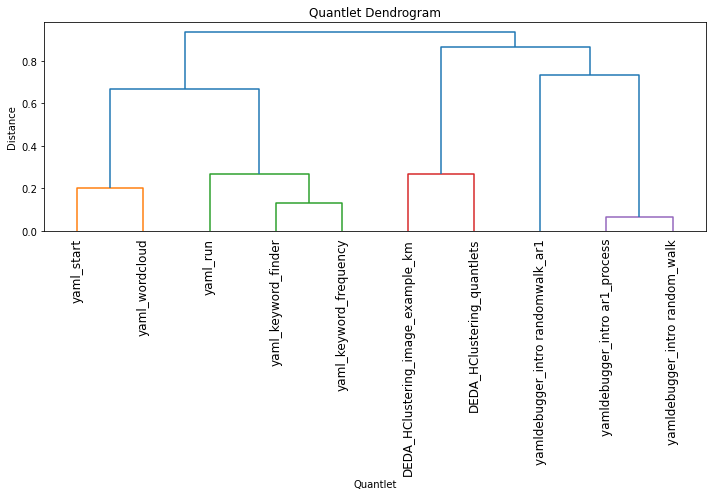

In [10]:
plt.figure(figsize=(10, 7))  
plt.title("Quantlet Dendrogram")  
plt.xlabel('Quantlet')
plt.ylabel('Distance')
Z = shc.linkage(train_X[-10:], method='single', metric='hamming')
dend = shc.dendrogram(Z, labels=labels[-10:], leaf_rotation=90) 
plt.tight_layout()
plt.savefig(f'{IMG_PATH}dendr_small.png', transparent=True)
d = pairwise_distances(train_X[-10:], metric='hamming')

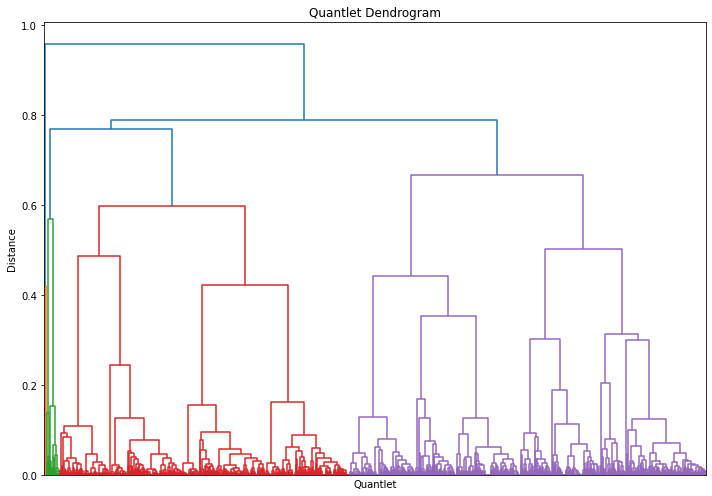

In [11]:
plt.figure(figsize=(10, 7))  
plt.title("Quantlet Dendrogram")  
plt.xlabel('Quantlet')
plt.ylabel('Distance')
Z = shc.linkage(train_X, method='average', metric='cosine')
dend = shc.dendrogram(Z, leaf_rotation=90, no_labels=True, count_sort=True)  
plt.tight_layout()
plt.savefig(f'{IMG_PATH}dendr_full.png', transparent=True)

In [12]:
clusters = fcluster(Z, 0.7, criterion='distance')

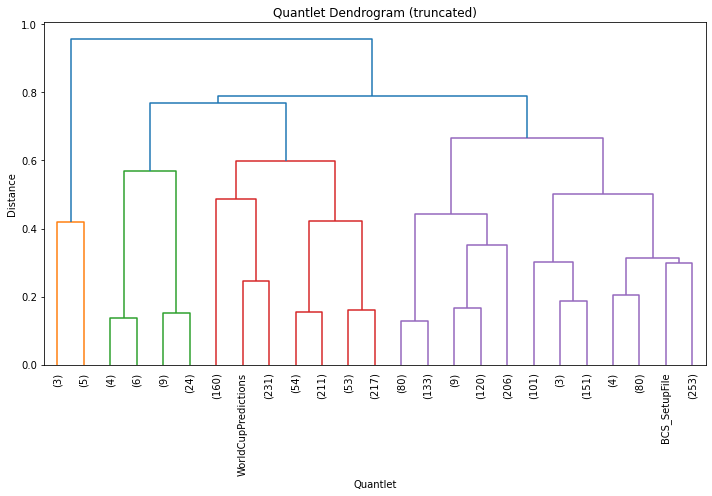

In [13]:
plt.figure(figsize=(10, 7))  
plt.title("Quantlet Dendrogram (truncated)")  
plt.xlabel('Quantlet')
plt.ylabel('Distance')
Z = shc.linkage(train_X,  method='average', metric='cosine')
dend = shc.dendrogram(Z, truncate_mode='lastp', p=25, labels=labels, leaf_rotation=90, count_sort=True)
plt.tight_layout()
plt.savefig(f'{IMG_PATH}dendr_trunc.png', transparent=True)

In [14]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

In [15]:
#Z = shc.linkage(train_X, method='average', metric='cosine')
max_d = 10
#clusters = fcluster(Z, max_d, criterion='maxclust')
cluster_labels = {}  
for i in range(1, max_d+1):
    df_ = pd.DataFrame(columns = ['word', 'count'])
    df_['word'], df_['count'] = np.unique(train_X[clusters==i], return_counts=True)
    df_ = df_.sort_values(by=['count'], ascending=False)
    #print(df.head(20))
    temp = []
    for word in df_.word.values[1:10]:
        if word != 0:
            temp.append(reverse_word_map[word])
    cluster_labels[i] = ' '.join(temp)

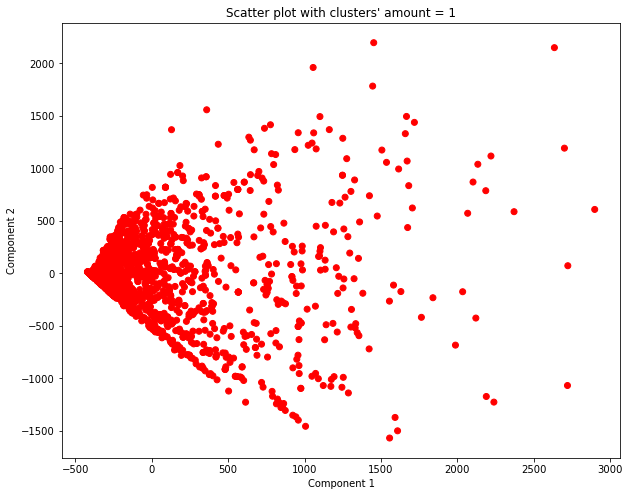

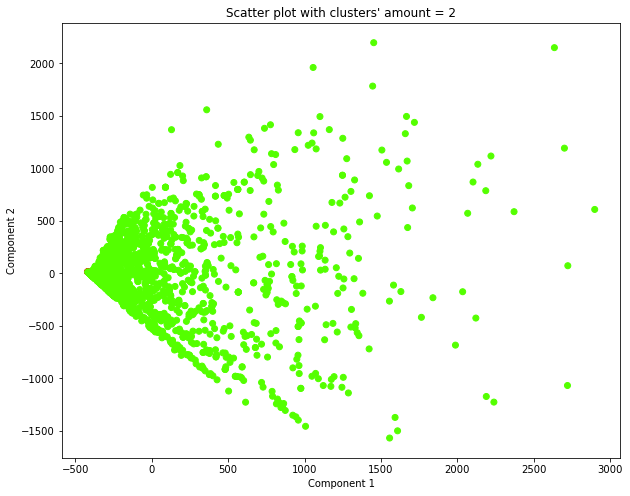

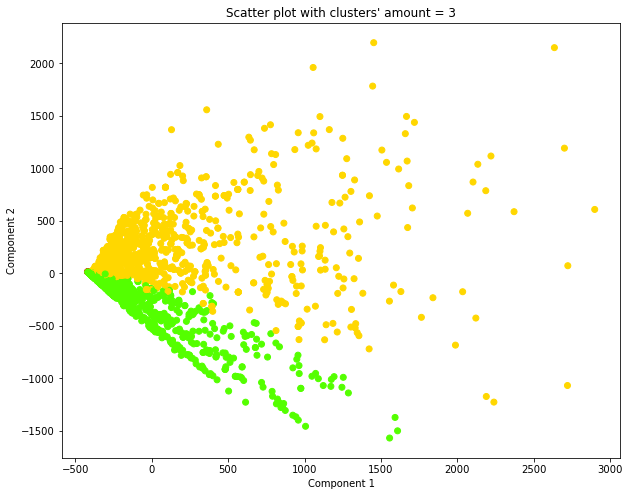

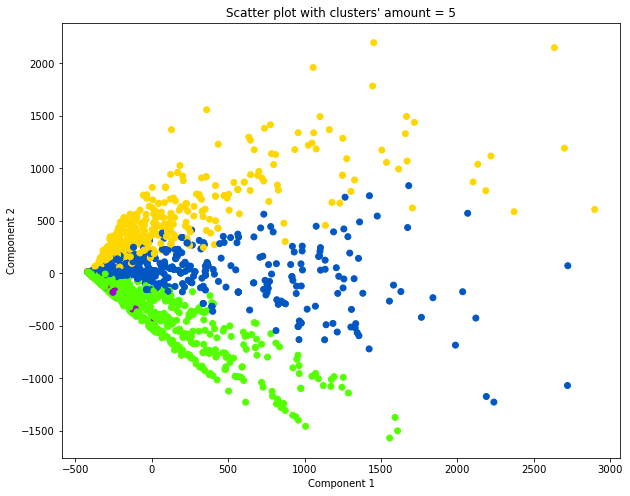

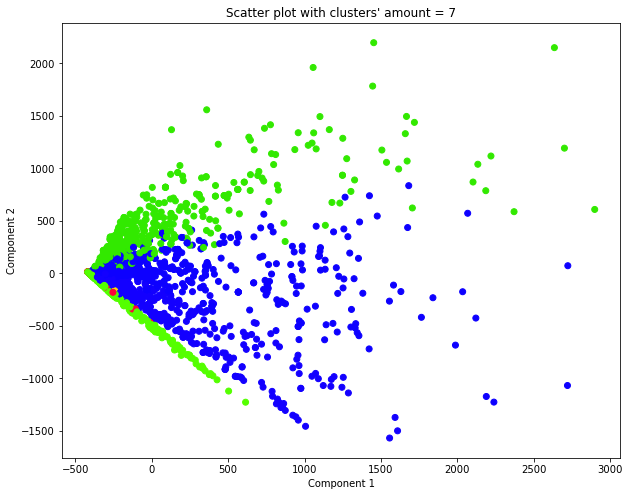

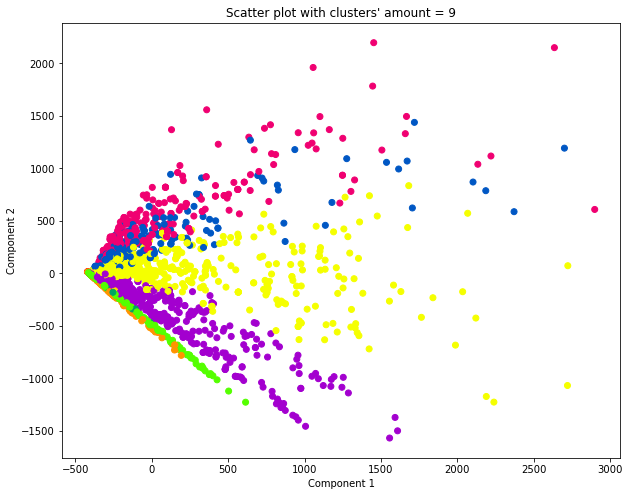

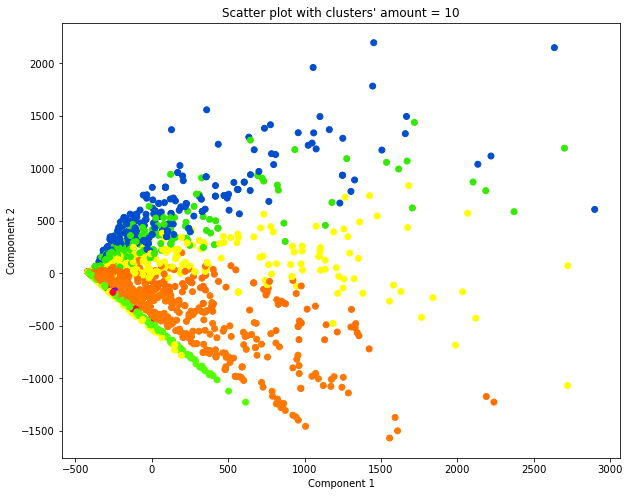

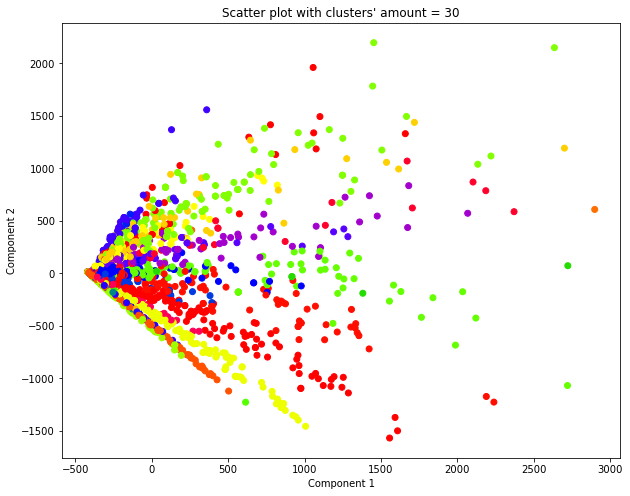

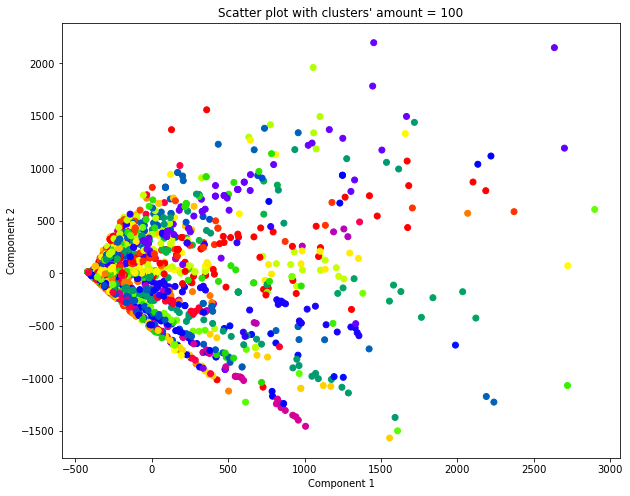

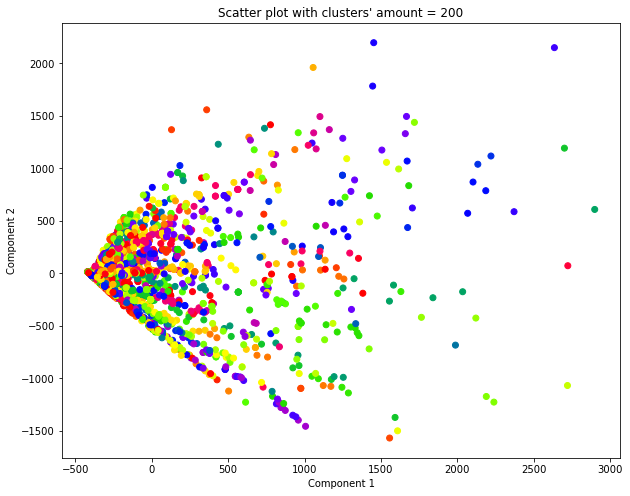

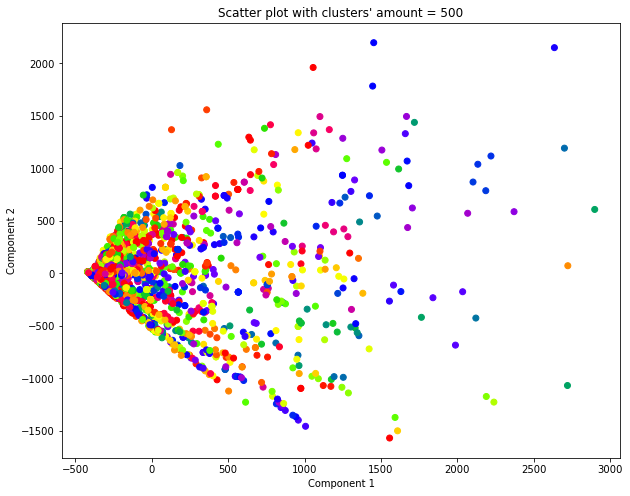

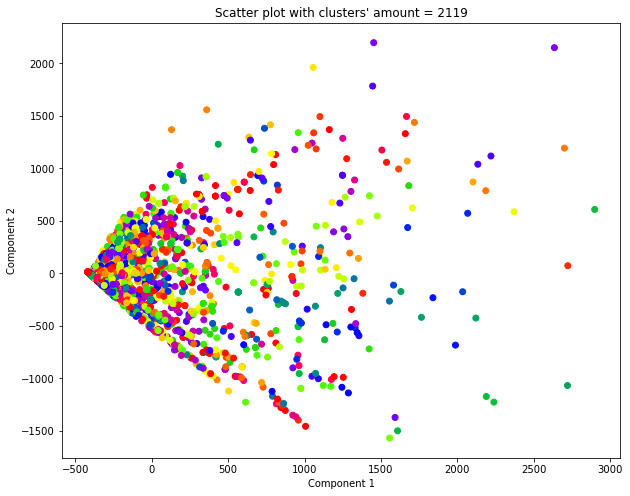

In [18]:
# prepare for plotting
pca = PCA(n_components=2)
pca.fit(train_X)
X = pca.transform(train_X)

for i in [1, 2, 3, 5, 7, 9, 10, 30, 100, 200, 500, len(df.keywords)]:
    max_d = i
    clusters = fcluster(Z, max_d, criterion='maxclust')
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'Scatter plot with clusters\' amount = {i}')
    filename=f'images/step'+str(i)+'.png'
    plt.savefig(filename, dpi=96, transparent=True)
    plt.gca()

In [19]:
tsne = TSNE(n_components=2)
tsne.fit(train_X)
X_t = tsne.fit_transform(train_X)

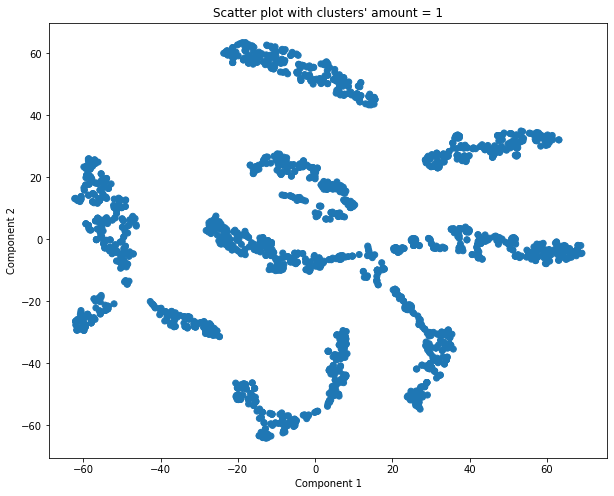

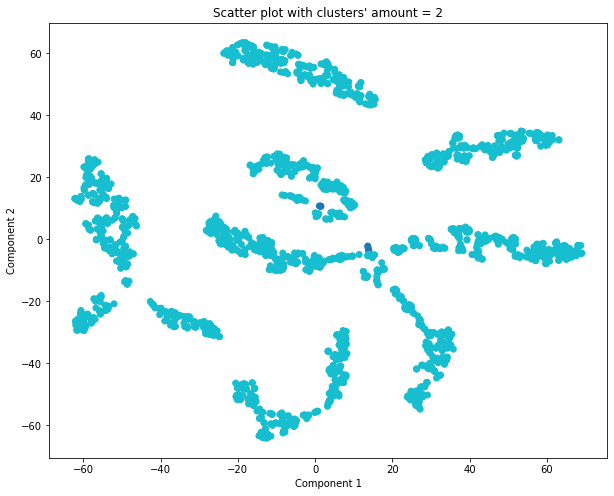

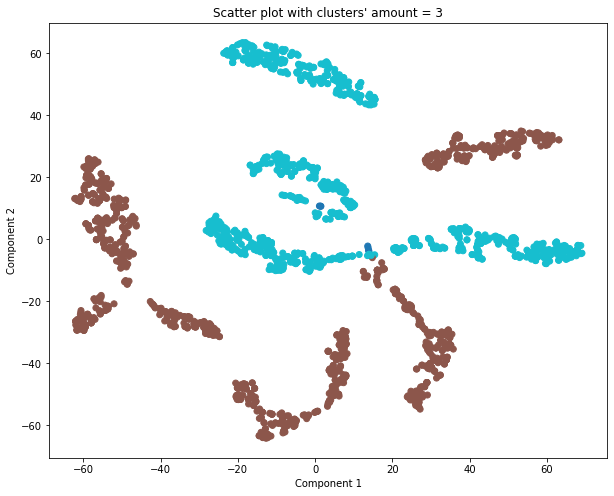

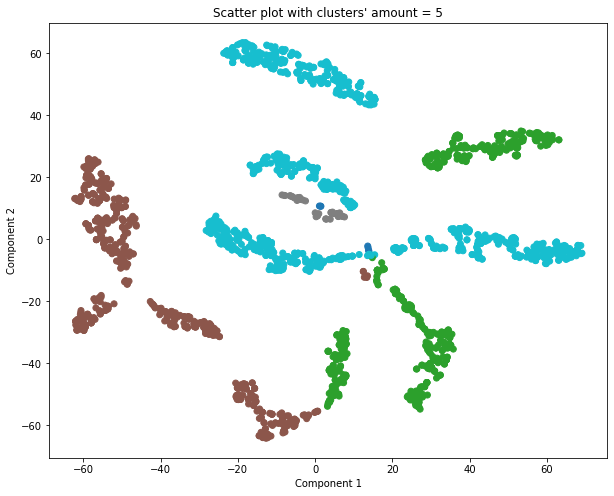

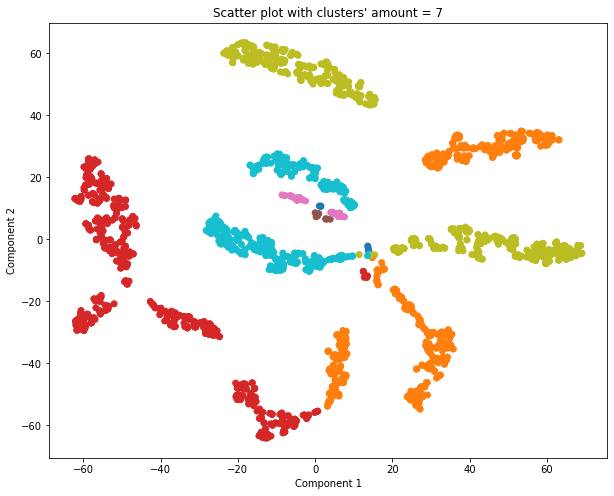

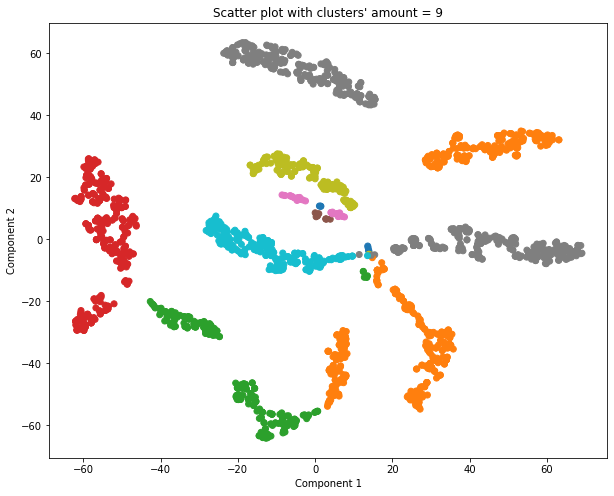

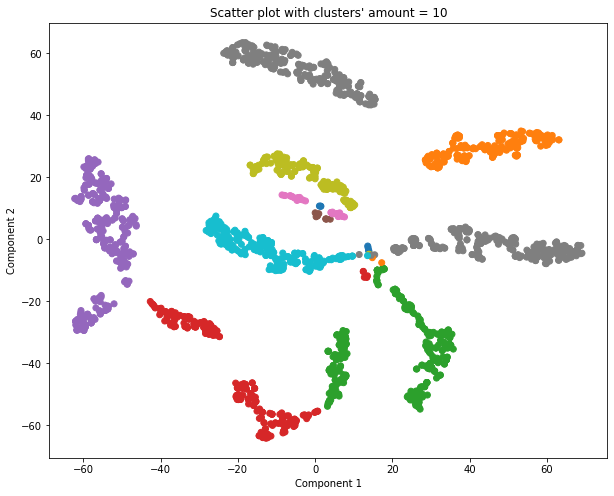

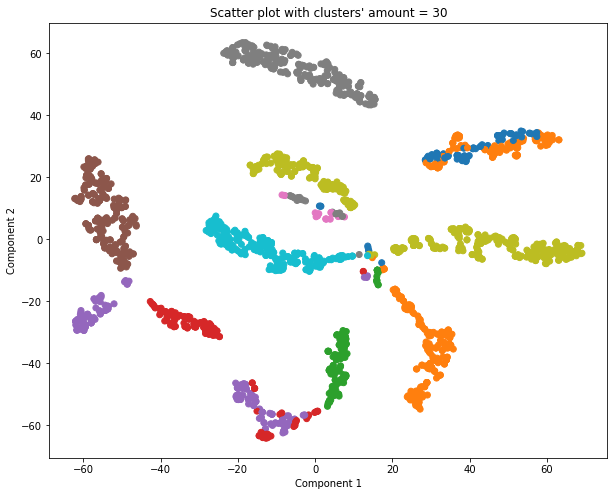

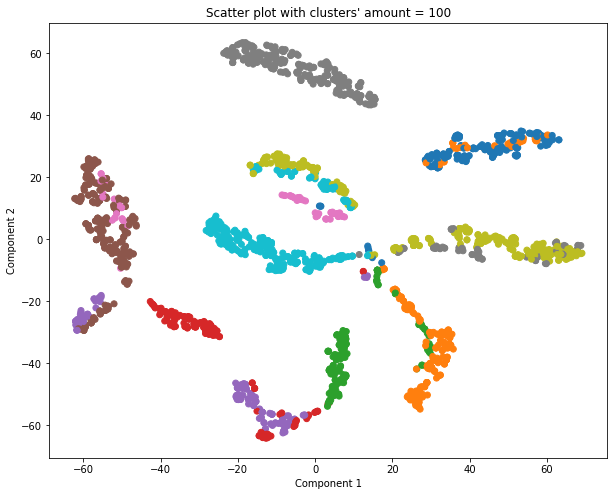

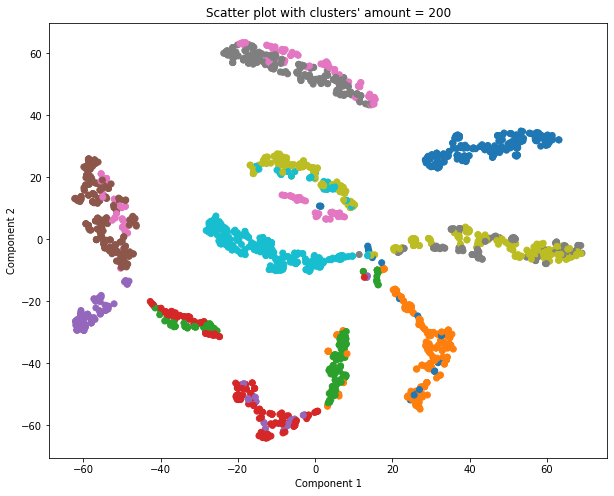

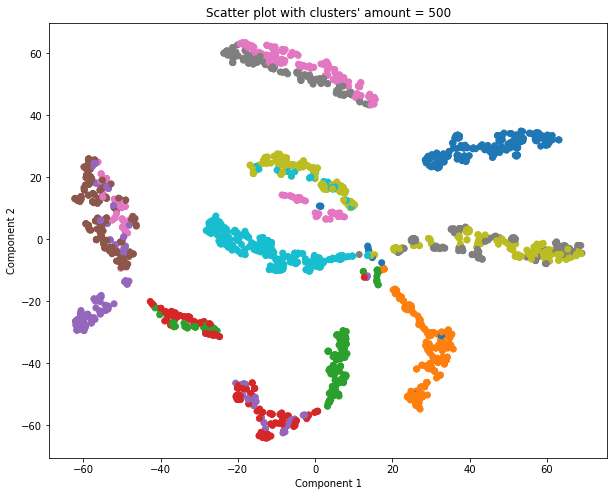

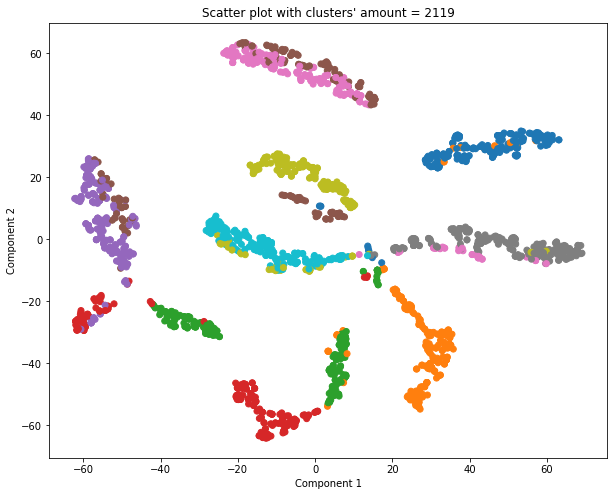

In [22]:
for i in [1, 2, 3, 5, 7, 9, 10, 30, 100, 200, 500, len(df.keywords)]:
    max_d = i
    clusters = fcluster(Z, max_d, criterion='maxclust')
    plt.figure(figsize=(10, 8))
    plt.scatter(X_t[:,0], X_t[:,1], c=clusters, cmap='tab10')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'Scatter plot with clusters\' amount = {i}')
    filename=f'images2/TSNE_step'+str(i)+'.png'
    plt.savefig(filename, dpi=96, transparent=True)
    plt.gca()

In [23]:
max_d

2119

In [24]:
cluster_labels

{1: 'density kernel plot var algorithm networks animation hash worldmap',
 2: 'plot representation graphical data visualization financial series time estimation',
 3: 'distribution volatility stable estimation model regression autoregressive markov plot',
 4: 'plot graphical representation visualization distribution financial regression data time',
 5: '',
 6: '',
 7: '',
 8: '',
 9: '',
 10: ''}

<AxesSubplot:title={'center':"Scatter plot with clusters' amount = 10"}, xlabel='Component 1', ylabel='Component 2'>

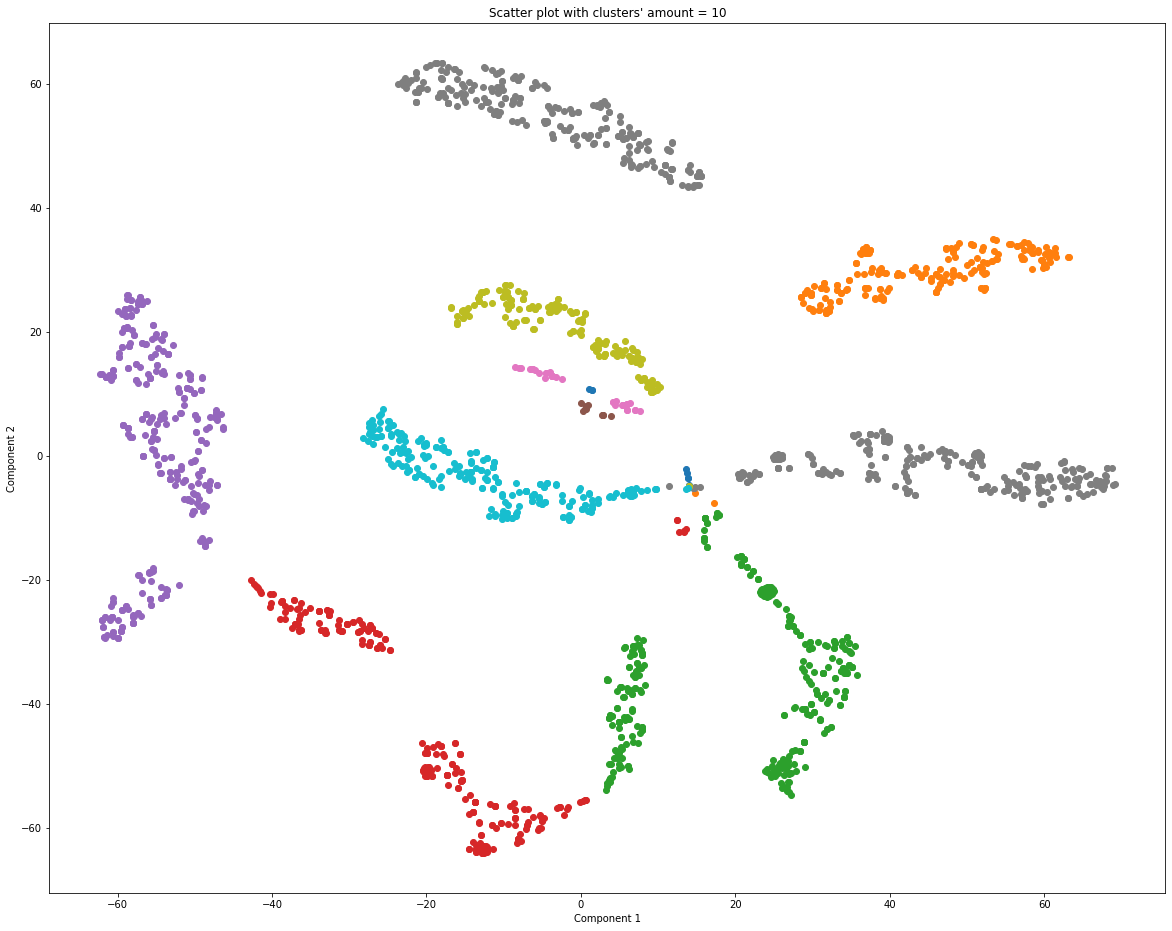

In [26]:
max_d=10
clusters = fcluster(Z, max_d, criterion='maxclust')
plt.figure(figsize=(20, 16))
for i in range(1, max_d+1):
    df_ = pd.DataFrame(columns = ['word', 'count'])
    df_['word'], df_['count'] = np.unique(train_X[clusters==i], return_counts=True)
    df_ = df_.sort_values(by=['count'], ascending=False)
    #print(df.head(20))
    temp = []
    for word in df_.word.values[1:10]:
        if word != 0:
            temp.append(reverse_word_map[word])
    cluster_labels[i] = ' '.join(temp)       
    plt.scatter(X_t[clusters==i,0], X_t[clusters==i,1], label = cluster_labels[i])
#plt.legend(loc = 'upper left', prop={'size': 10})
#plt.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), prop={'size': 10})
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'Scatter plot with clusters\' amount = {10}')
filename=f'{IMG_PATH}TSNE_10_clusters.png'
plt.savefig(filename, dpi=96, transparent=True)
plt.gca()